In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = np.load('./data_for_xi_calculation/dX_data_t=27.0_to_t=54.0_c=1by64.npz')

In [46]:
data.files

['dX_x', 'dX_y']

In [47]:
dX1 = data['dX_x']
dX2 = data['dX_y']

In [48]:
dX1.shape, dX2.shape

((46, 29120), (46, 29120))

In [49]:
from numpy import linalg as LA
from scipy import signal

In [50]:
Dt_c = 0.02
scaled_dX1 = dX1/np.sqrt(Dt_c)
scaled_dX2 = dX2/np.sqrt(Dt_c)

In [51]:
F1 = signal.detrend(scaled_dX1, axis=0, type='constant')
F1.shape

(46, 29120)

In [9]:
F2 = signal.detrend(scaled_dX2, axis=0, type='constant')

In [10]:
Ax, bx, CxT = LA.svd(F1, full_matrices=False)
Ay, by, CyT = LA.svd(F2, full_matrices=False)

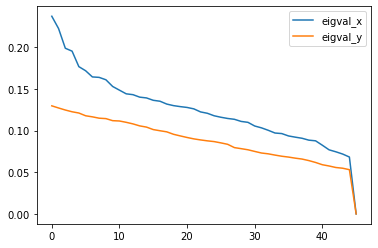

In [11]:
plt.plot(bx, label='eigval_x'), plt.plot(by, label='eigval_y')
plt.legend()

In [35]:
bx, by

(array([2.37089813e-01, 2.22335746e-01, 1.98704958e-01, 1.95212955e-01,
        1.76635245e-01, 1.71720677e-01, 1.64303414e-01, 1.63764287e-01,
        1.60900604e-01, 1.52849081e-01, 1.48437672e-01, 1.44040837e-01,
        1.43026360e-01, 1.40052322e-01, 1.39119714e-01, 1.36276829e-01,
        1.35149738e-01, 1.31745679e-01, 1.29878401e-01, 1.28685194e-01,
        1.27703150e-01, 1.25999260e-01, 1.22327423e-01, 1.20713406e-01,
        1.17719490e-01, 1.15945923e-01, 1.14487036e-01, 1.13477929e-01,
        1.10929579e-01, 1.09842043e-01, 1.05443981e-01, 1.03225145e-01,
        1.00303144e-01, 9.70312836e-02, 9.63636383e-02, 9.35170336e-02,
        9.20593286e-02, 9.07356154e-02, 8.84742920e-02, 8.76769888e-02,
        8.23866189e-02, 7.68495553e-02, 7.45057247e-02, 7.18165452e-02,
        6.82372520e-02, 1.44195431e-16]),
 array([1.29632722e-01, 1.27068833e-01, 1.24613253e-01, 1.22508096e-01,
        1.21016801e-01, 1.17727604e-01, 1.16439491e-01, 1.14814619e-01,
        1.14311636e-01

In [12]:
Bx = np.diag(bx/np.sqrt(F1.shape[0]-1))
By = np.diag(by/np.sqrt(F2.shape[0]-1))

In [13]:
Bx.shape, CxT.shape

((46, 46), (46, 29120))

In [14]:
BxCxT = np.matmul(Bx, CxT)
ByCyT = np.matmul(By, CyT)

In [15]:
np.allclose(F1, np.matmul(Ax, np.matmul(np.diag(bx), CxT))), np.allclose(F2, np.matmul(Ay, np.matmul(np.diag(by), CyT)))

(True, True)

In [16]:
var_x_vec = bx**2/(F1.shape[0]-1)
var_y_vec = by**2/(F1.shape[0]-1)

In [37]:
n_eigval = 44

p1 = 100*np.sum(var_x_vec[:n_eigval])/(np.sum(var_x_vec))
p2 = 100*np.sum(var_y_vec[:n_eigval])/(np.sum(var_y_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues x component: {p1}')
print(f'Total vairance captured by first {n_eigval} eigenvalues y component: {p2}')

Total vairance captured by first 44 eigenvalues x component: 99.41485710297063
Total vairance captured by first 44 eigenvalues y component: 99.26937550090783


In [34]:
n_eigval = 35

p1 = 100*np.sum(var_x_vec[:n_eigval])/(np.sum(var_x_vec))
p2 = 100*np.sum(var_y_vec[:n_eigval])/(np.sum(var_y_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues x component: {p1}')
print(f'Total vairance captured by first {n_eigval} eigenvalues y component: {p2}')

Total vairance captured by first 35 eigenvalues x component: 91.3256673476835
Total vairance captured by first 35 eigenvalues y component: 90.38440077558953


In [19]:
BxCxT.shape, BxCxT

((46, 29120),
 array([[ 6.33585493e-04,  6.19453711e-04,  2.69742425e-04, ...,
          2.19123946e-04,  8.27140718e-05,  7.67200329e-05],
        [-2.85340971e-04, -3.27247106e-04, -1.81679264e-04, ...,
         -1.10961433e-04,  8.24814039e-05,  8.54198859e-05],
        [ 2.20179636e-04,  2.34542006e-04,  3.47824621e-04, ...,
         -7.59241499e-05, -1.99445019e-04, -2.01789049e-04],
        ...,
        [-3.90896354e-06, -3.62242480e-06, -2.97242915e-06, ...,
          1.46868939e-05,  8.48012379e-06,  9.10904204e-06],
        [ 2.45027780e-05,  2.36743898e-05,  2.16635005e-05, ...,
          3.41585644e-06, -5.48992830e-06, -4.27114344e-06],
        [ 4.57298312e-18,  8.61515801e-19,  7.86936594e-18, ...,
          5.05330861e-21,  3.02654026e-20, -2.55050648e-19]]))

In [20]:
ByCyT.shape, ByCyT

((46, 29120),
 array([[-8.08148778e-19,  5.25214579e-19, -2.10665854e-05, ...,
          3.30988110e-05, -6.63693658e-19, -5.04690908e-19],
        [-6.65364462e-19,  2.71523520e-18,  1.02719420e-05, ...,
          7.01062297e-06,  6.00214874e-19,  5.51765029e-19],
        [ 3.59917568e-19, -4.40297721e-19,  5.91697122e-07, ...,
          7.68669618e-06, -5.93953154e-19, -5.26276381e-19],
        ...,
        [ 9.13589579e-19, -1.89017252e-19, -1.62977028e-06, ...,
         -2.45147914e-06, -5.63654615e-20, -4.93576846e-20],
        [-7.66702474e-19, -7.02129007e-19, -3.07399219e-06, ...,
         -2.10373069e-06,  1.96533203e-20,  1.47433545e-20],
        [-9.23348983e-19,  1.24991279e-18,  1.67177886e-18, ...,
         -3.10920140e-21,  1.86749736e-34, -2.72789457e-34]]))

In [21]:
CxT.shape

(46, 29120)

In [22]:
CyT.shape

(46, 29120)

In [23]:
stacked1 = np.stack((BxCxT, ByCyT), axis=-1)
stacked1.shape

(46, 29120, 2)

In [24]:
xi_mat_1 = stacked1

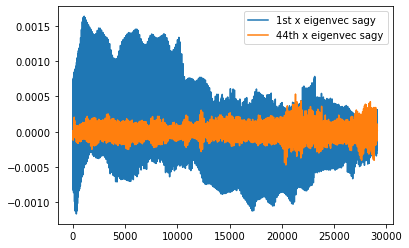

In [38]:
plt.plot(xi_mat_1[0,:,0], label='1st x eigenvec sagy'), plt.plot(xi_mat_1[-3,:,0], label='44th x eigenvec sagy')
plt.legend()

In [26]:
stacked2 = np.stack((CxT, CyT), axis=-1)
stacked2.shape

(46, 29120, 2)

In [27]:
xi_mat_2 = stacked2

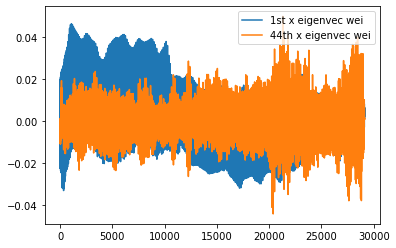

In [39]:
plt.plot(xi_mat_2[0,:,0], label='1st x eigenvec wei'), plt.plot(xi_mat_2[-3,:,0], label='44th x eigenvec wei')
plt.legend()

In [40]:
eig_vec1 = xi_mat_1[:44,:,:]
eig_vec1.shape

(44, 29120, 2)

In [41]:
data_file = './xi_vec_data/xi_matrix_44_eigvec_Sagy_method_c_1_by_64.npz'

np.savez(data_file, xi_mat1 = eig_vec1)

In [42]:
eig_vec2 = xi_mat_2[:44,:,:]
eig_vec2.shape

(44, 29120, 2)

In [43]:
data_file = './xi_vec_data/xi_matrix_44_eigvec_wei_method_c_1_by_64.npz'

np.savez(data_file, xi_mat2 = eig_vec2)